In [10]:
push!(LOAD_PATH, "../src")
include("../src/lanczos.jl")

using .StochasticLanczos
using SparseArrays
using LinearAlgebra
using Plots

Import the test case. This includes the sparse matrix A, along with the matrix function f(A) = exp(A), and its exact computation

In [11]:
include("test_case_1.jl");

Now test the implementation of the stochastic Lanczos quadrature by comparing the approximate calculation with the exact calculation of $\omega^\top f(A)\omega$

In [12]:
ω=randn(n);

In [13]:
k = 4
N = 20
ks = 1:N
lanczos_approx = zeros(N)
for k in ks
    lanczos_approx[k] = stochastic_lanczos_quadrature(f, matvecA, ω, k)
end

In [14]:
exact = ω'*exactfA*ω

9.082532945040998e45 + 0.0im

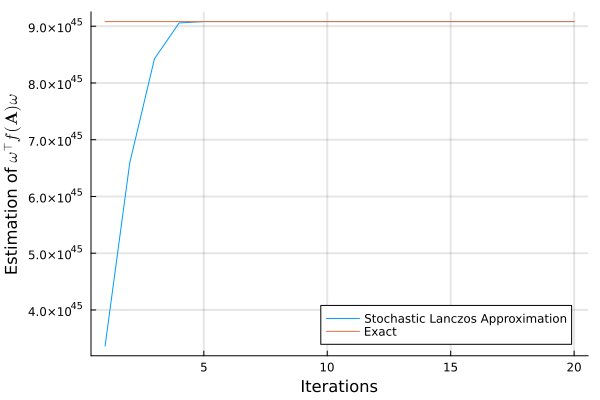

In [15]:
using LaTeXStrings

plot(ks, lanczos_approx, label="Stochastic Lanczos Approximation", xlabel="Iterations", 
    ylabel="Estimation of " * L"\mathbf{\omega}^\top f(\mathbf{A})\mathbf{\omega}", gridlinewidth=2)
plot!(ks, fill(real(exact), N), label="Exact")